<a href="https://www.kaggle.com/code/bhavinmoriya/hypothesis-testing?scriptVersionId=111670023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Often we have some sample and we believe that the sample represent some population. This could be statistically tested using Hypothesis testing :
1. There are two hypothesis
    - Null Hyp : What we believe is true.
    - Alternative Hyp : Which says what we believe is not true
2. Decide the threshold (denoted by $\alpha$) to reject Null hyp. Often we take $\alpha \le .05$. That is if statistics 
$\le \alpha$. We do not reject Null hyp (**We never accept null hyp, we either reject it or do not reject it**).



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.stats import norm, gamma, uniform, beta, binom, geom, expon, poisson, t

# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pop1 = poisson.rvs(loc=18, mu=35, size=100_000)
pop2 = poisson.rvs(loc=18, mu=10, size=200_000)
pop = np.concatenate((pop1, pop2))

samp1 = poisson.rvs(loc=18, mu=30, size=100)
samp2 = poisson.rvs(loc=18, mu=10, size=200)
sample = np.concatenate((samp1, samp2))

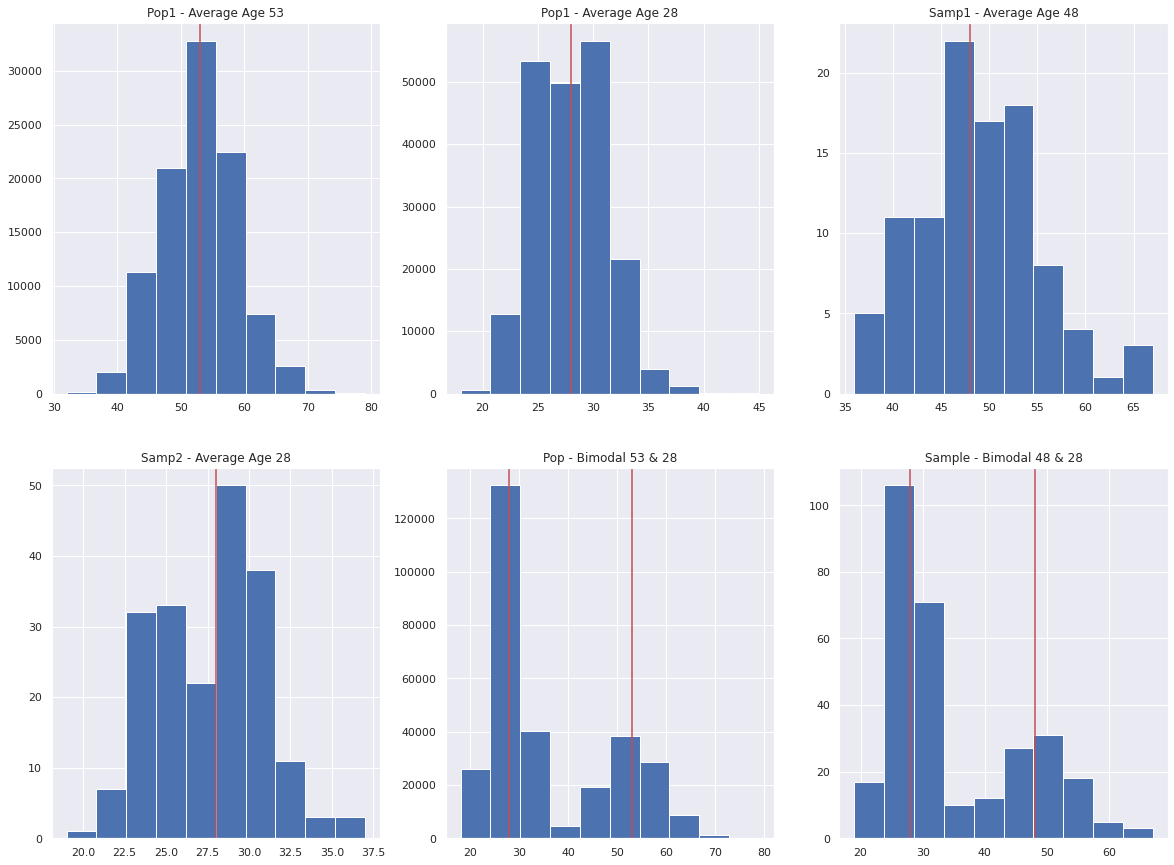

In [3]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
ax = ax.flatten()
ax[0].hist(pop1, label='Mean 53');
ax[0].axvline(53, c='r')
ax[0].set_title('Pop1 - Average Age 53')
ax[1].hist(pop2, label='Mean 28');
ax[1].axvline(28, c='r')
ax[1].set_title('Pop1 - Average Age 28')
ax[2].hist(samp1, label='Mean 28');
ax[2].axvline(48, c='r')
ax[2].set_title('Samp1 - Average Age 48')
ax[3].hist(samp2, label='Mean 28');
ax[3].axvline(28, c='r')
ax[3].set_title('Samp2 - Average Age 28');

ax[4].hist(pop, label='Mean 28');
ax[4].axvline(28, c='r')
ax[4].axvline(53, c='r')
ax[4].set_title('Pop - Bimodal 53 & 28');
ax[5].hist(sample, label='Mean 28');
ax[5].axvline(28, c='r')
ax[5].axvline(48, c='r')
ax[5].set_title('Sample - Bimodal 48 & 28');
# pop1

We can see distributions are different. Of course, we did know apriori that is the case. But imagine that, if we had just been given the population and sample without no information, then we could use T-test to see if null hyp (sample is from population) is true or not.